In [1]:
import os
REPO_PATH = os.getcwd().split('notebooks')[0]

import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import MACCSkeys
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns 
from lets_plot import *
LetsPlot.setup_html()

In [2]:
# load data 
data = pd.read_csv(REPO_PATH + '/outputs/num_atoms_and_logp_generation.csv')
data['guidance'] = data['guidance'].astype('str')

# Property Distributions

In [3]:
LetsPlot.setup_html()
g = ggplot() + \
    geom_density2d(data=data, mapping=aes("number_of_atoms", "logp", color='guidance'), size=1, show_legend=True) + \
    scale_color_manual(values=['#d4d6d5', '#15c2a5'])
g

# MACCS PCA

In [4]:
smiles = data.canonical_smiles

mols = [Chem.MolFromSmiles(s) for s in smiles]
fps = [MACCSkeys.GenMACCSKeys(x).ToList() for x in mols]

fps = np.array(fps)

labels = np.reshape(np.array([str(g) for g in data.guidance]),(len(smiles),1))

fps = pd.DataFrame(fps)

fps = pd.concat([fps, pd.DataFrame(labels)], axis=1)


features = [('key-' + str(i)) for i in range(fps.shape[1]-1)]
features_labels = np.append(features,'label')

fps.columns = features_labels

x = fps.loc[:, features].values

print(f' mean: {np.mean(x)}, std: {np.std(x)}')

feat_cols = ['feature'+str(i) for i in range(x.shape[1])]

normalised_fps = pd.DataFrame(x,columns=feat_cols)


pca_fps = PCA(n_components=2)
principalComponents_fps = pca_fps.fit_transform(x)

principal_fps_Df = pd.DataFrame(data = principalComponents_fps, 
                        columns = ['principal component 1', 'principal component 2'])

principal_fps_Df['guidance'] = labels

print('Explained variation per principal component: {}'.format(pca_fps.explained_variance_ratio_))

 mean: 0.19447305389221556, std: 0.3957944987010949
Explained variation per principal component: [0.14684446 0.0828223 ]


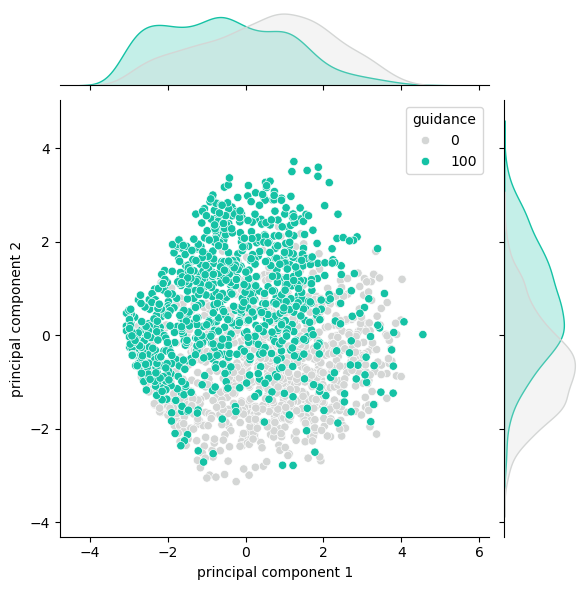

In [5]:
sns.jointplot(data=principal_fps_Df, x='principal component 1', y='principal component 2', hue="guidance", 
              palette={
                '100': '#15c2a5',
                '0': '#d4d6d5'
                        }
            )